In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from numpy import sqrt 

#Tien Xu Ly
from sklearn.preprocessing import MinMaxScaler

#Draw Flot
import matplotlib.pyplot as plt

#Cacuale error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#distance Libaray
from dtw import dtw
from scipy.spatial.distance import euclidean

#FFNN Libarary
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
def cleanData(df):
    # Replace null values with 0
    df.fillna(0, inplace=True)
    
    # Remove outliers by replacing values outside of 3 standard deviations with the mean
    std = df['Close'].std()
    mean = df['Close'].mean()
    df['Close'] = np.where(df['Close'] > (mean + 10*std), mean, df['Close'])
    df['Close'] = np.where(df['Close'] < (mean - 10*std), mean, df['Close'])
    
    # # Scale data_AMZN to range [0, 1]
    scaler = MinMaxScaler()
    df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    
    # Fill in missing values with the mean of the previous and next values
    df['Close'] = df['Close'].interpolate(method='linear')
    return df
    

In [5]:
#Xử lý dữ liệu thành dữ liệu đầu vào và đầu ra cho mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
        print(data[startWindow:(startWindow + size_window), :])
        print("-----")
        print(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])     
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


In [6]:
def create_model(num_layers_hidden=1, num_neurons_hidden=1):
    model = Sequential()
    model.add(Dense(num_neurons_hidden, input_dim=size_window, activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# 80 train, 20 test

# Tìm Số Neural Lớp Ẩn 

# AVAL

In [7]:
# Load dữ liệu
dataCSV = pd.read_csv('../../Dataset/AVAL.csv')

df=dataCSV[['Close']]
data = cleanData(df)

# Chia dữ liệu thành train set và test set
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:, :]

size_window = 7
size_predict=1
stepWindow=1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)


[[0.97543   ]
 [0.98402947]
 [0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]]
-----
[0.96928747]
[[0.98402947]
 [0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]]
-----
[0.97665853]
[[0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]]
-----
[0.97788706]
[[1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]]
-----
[0.97911547]
[[0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]]
-----
[0.97174453]
[[0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]]
-----
[0.95945947]
[[0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]
 [0.95945947]]
-----
[0.95086]
[[0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]
 [0.95945947]
 [0.95086   ]]
-----
[0.91400494]
[[0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]
 [0

[0.3722359]
[[0.33169537]
 [0.35503684]
 [0.35872243]
 [0.3722359 ]
 [0.38083538]
 [0.37960685]
 [0.3722359 ]]
-----
[0.36977885]
[[0.35503684]
 [0.35872243]
 [0.3722359 ]
 [0.38083538]
 [0.37960685]
 [0.3722359 ]
 [0.36977885]]
-----
[0.37960685]
[[0.35872243]
 [0.3722359 ]
 [0.38083538]
 [0.37960685]
 [0.3722359 ]
 [0.36977885]
 [0.37960685]]
-----
[0.37469285]
[[0.3722359 ]
 [0.38083538]
 [0.37960685]
 [0.3722359 ]
 [0.36977885]
 [0.37960685]
 [0.37469285]]
-----
[0.36363643]
[[0.38083538]
 [0.37960685]
 [0.3722359 ]
 [0.36977885]
 [0.37960685]
 [0.37469285]
 [0.36363643]]
-----
[0.3624079]
[[0.37960685]
 [0.3722359 ]
 [0.36977885]
 [0.37960685]
 [0.37469285]
 [0.36363643]
 [0.3624079 ]]
-----
[0.35012284]
[[0.3722359 ]
 [0.36977885]
 [0.37960685]
 [0.37469285]
 [0.36363643]
 [0.3624079 ]
 [0.35012284]]
-----
[0.34029484]
[[0.36977885]
 [0.37960685]
 [0.37469285]
 [0.36363643]
 [0.3624079 ]
 [0.35012284]
 [0.34029484]]
-----
[0.3427519]
[[0.37960685]
 [0.37469285]
 [0.36363643]
 [0.

In [9]:
#define the grid search parameters
param_grid_FFNN = {'batch_size': [8, 16, 32, 64, 128],
              'num_neurons_hidden': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'num_layers_hidden' : [1]}
epochArr = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230, 240,250,260,270,280,290, 300]


In [38]:
df_MseWith_Neural = pd.DataFrame([],  columns =  ["Neural","Batch_Size","Epoch", "MSE"])
for epoch in epochArr:
    # create the model
    model_FFNN = KerasRegressor(build_fn=create_model_FFNN, verbose=0)
    # perform the grid search
    grid_FFNN = GridSearchCV(estimator=model_FFNN, param_grid=param_grid_FFNN, cv=3)
    grid_result_FFNN = grid_FFNN.fit(X_train, y_train)
    # train the model with the best parameters
    best_params_FFNN = grid_result_FFNN.best_params_
    model_FFNN = create_model_FFNN(1,best_params_FFNN['num_neurons_hidden'])
    model_FFNN.fit(X_train, y_train, epochs=epoch, batch_size=best_params_FFNN['batch_size'], verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=10)], shuffle=False)
    # make predictions on the test set
    predictions_FFNN = model_FFNN.predict(X_test)
    # get the best weights from the model
    model_FFNN.save_weights('../BestParam/FFNN/AVAL/FFNN_Find_BestWeights/'+str(best_params_FFNN['num_neurons_hidden'])+'_NeuralHidden_'+str(best_params_FFNN['batch_size'])+'_BatchSize_'+str(epoch)+'_Epoch_AVAL.h5') 
    
    # create the model
    model_FFNN1 = Sequential()
    model_FFNN1.add(Dense(best_params_FFNN['num_neurons_hidden'], input_dim=size_window, activation='sigmoid'))
    model_FFNN1.add(Dense(1))
    model_FFNN1.load_weights('../BestParam/FFNN/AVAL/FFNN_Find_BestWeights/'+str(best_params_FFNN['num_neurons_hidden'])+'_NeuralHidden_'+str(best_params_FFNN['batch_size'])+'_BatchSize_'+str(epoch)+'_Epoch_AVAL.h5')
    model_FFNN1.compile(loss='mean_squared_error', optimizer='adam')
    y_pred= model_FFNN1.predict(X_test)
    rowMseWithNeural = pd.Series([best_params_FFNN['num_neurons_hidden'],best_params_FFNN['batch_size'],epoch, mean_squared_error(y_test , y_pred)], index=df_MseWith_Neural.columns)
    df_MseWith_Neural = df_MseWith_Neural.append(rowMseWithNeural,ignore_index=True)   

Epoch 1/10
99/99 - 1s - loss: 0.2806 - 906ms/epoch - 9ms/step
Epoch 2/10
99/99 - 0s - loss: 0.0579 - 153ms/epoch - 2ms/step
Epoch 3/10
99/99 - 0s - loss: 0.0366 - 144ms/epoch - 1ms/step
Epoch 4/10
99/99 - 0s - loss: 0.0307 - 147ms/epoch - 1ms/step
Epoch 5/10
99/99 - 0s - loss: 0.0256 - 123ms/epoch - 1ms/step
Epoch 6/10
99/99 - 0s - loss: 0.0209 - 118ms/epoch - 1ms/step
Epoch 7/10
99/99 - 0s - loss: 0.0168 - 117ms/epoch - 1ms/step
Epoch 8/10
99/99 - 0s - loss: 0.0133 - 118ms/epoch - 1ms/step
Epoch 9/10
99/99 - 0s - loss: 0.0104 - 118ms/epoch - 1ms/step
Epoch 10/10
99/99 - 0s - loss: 0.0082 - 123ms/epoch - 1ms/step
7/7 [==============================] - 0s 1ms/step
Epoch 1/20
99/99 - 1s - loss: 1.0727 - 524ms/epoch - 5ms/step
Epoch 2/20
99/99 - 0s - loss: 0.1680 - 114ms/epoch - 1ms/step
Epoch 3/20
99/99 - 0s - loss: 0.0279 - 109ms/epoch - 1ms/step
Epoch 4/20
99/99 - 0s - loss: 0.0151 - 109ms/epoch - 1ms/step
Epoch 5/20
99/99 - 0s - loss: 0.0126 - 125ms/epoch - 1ms/step
Epoch 6/20
99/99 -

Epoch 27/50
99/99 - 0s - loss: 0.0038 - 109ms/epoch - 1ms/step
Epoch 28/50
99/99 - 0s - loss: 0.0036 - 125ms/epoch - 1ms/step
Epoch 29/50
99/99 - 0s - loss: 0.0034 - 114ms/epoch - 1ms/step
Epoch 30/50
99/99 - 0s - loss: 0.0032 - 109ms/epoch - 1ms/step
Epoch 31/50
99/99 - 0s - loss: 0.0030 - 109ms/epoch - 1ms/step
Epoch 32/50
99/99 - 0s - loss: 0.0029 - 109ms/epoch - 1ms/step
Epoch 33/50
99/99 - 0s - loss: 0.0028 - 118ms/epoch - 1ms/step
Epoch 34/50
99/99 - 0s - loss: 0.0027 - 102ms/epoch - 1ms/step
Epoch 35/50
99/99 - 0s - loss: 0.0026 - 125ms/epoch - 1ms/step
Epoch 36/50
99/99 - 0s - loss: 0.0025 - 109ms/epoch - 1ms/step
Epoch 37/50
99/99 - 0s - loss: 0.0024 - 109ms/epoch - 1ms/step
Epoch 38/50
99/99 - 0s - loss: 0.0024 - 127ms/epoch - 1ms/step
Epoch 39/50
99/99 - 0s - loss: 0.0023 - 109ms/epoch - 1ms/step
Epoch 40/50
99/99 - 0s - loss: 0.0023 - 109ms/epoch - 1ms/step
Epoch 41/50
99/99 - 0s - loss: 0.0023 - 109ms/epoch - 1ms/step
Epoch 42/50
99/99 - 0s - loss: 0.0022 - 109ms/epoch - 1

Epoch 44/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 45/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 46/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 47/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 48/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 49/70
99/99 - 0s - loss: 0.0012 - 109ms/epoch - 1ms/step
Epoch 50/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 51/70
99/99 - 0s - loss: 0.0011 - 123ms/epoch - 1ms/step
Epoch 52/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 53/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 54/70
99/99 - 0s - loss: 0.0011 - 125ms/epoch - 1ms/step
Epoch 55/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 56/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 57/70
99/99 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 58/70
99/99 - 0s - loss: 0.0010 - 109ms/epoch - 1ms/step
Epoch 59/70
99/99 - 0s - loss: 0.0010 - 109ms/epoch - 1

Epoch 20/90
50/50 - 0s - loss: 0.0072 - 67ms/epoch - 1ms/step
Epoch 21/90
50/50 - 0s - loss: 0.0061 - 62ms/epoch - 1ms/step
Epoch 22/90
50/50 - 0s - loss: 0.0051 - 47ms/epoch - 937us/step
Epoch 23/90
50/50 - 0s - loss: 0.0043 - 47ms/epoch - 937us/step
Epoch 24/90
50/50 - 0s - loss: 0.0036 - 57ms/epoch - 1ms/step
Epoch 25/90
50/50 - 0s - loss: 0.0031 - 63ms/epoch - 1ms/step
Epoch 26/90
50/50 - 0s - loss: 0.0026 - 62ms/epoch - 1ms/step
Epoch 27/90
50/50 - 0s - loss: 0.0023 - 47ms/epoch - 937us/step
Epoch 28/90
50/50 - 0s - loss: 0.0020 - 47ms/epoch - 937us/step
Epoch 29/90
50/50 - 0s - loss: 0.0018 - 63ms/epoch - 1ms/step
Epoch 30/90
50/50 - 0s - loss: 0.0016 - 62ms/epoch - 1ms/step
Epoch 31/90
50/50 - 0s - loss: 0.0015 - 62ms/epoch - 1ms/step
Epoch 32/90
50/50 - 0s - loss: 0.0014 - 62ms/epoch - 1ms/step
Epoch 33/90
50/50 - 0s - loss: 0.0013 - 47ms/epoch - 937us/step
Epoch 34/90
50/50 - 0s - loss: 0.0012 - 74ms/epoch - 1ms/step
Epoch 35/90
50/50 - 0s - loss: 0.0012 - 47ms/epoch - 937us/s

Epoch 59/100
50/50 - 0s - loss: 0.0014 - 62ms/epoch - 1ms/step
Epoch 60/100
50/50 - 0s - loss: 0.0014 - 62ms/epoch - 1ms/step
Epoch 61/100
50/50 - 0s - loss: 0.0014 - 62ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.0013 - 55ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.0013 - 47ms/epoch - 937us/step
Epoch 69/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 70/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 71/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 72/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 73/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch - 1ms/step
Epoch 74/100
50/50 - 0s - loss: 0.0013 - 62ms/epoch -

Epoch 85/110
99/99 - 0s - loss: 8.2925e-04 - 125ms/epoch - 1ms/step
Epoch 86/110
99/99 - 0s - loss: 8.2301e-04 - 125ms/epoch - 1ms/step
Epoch 87/110
99/99 - 0s - loss: 8.1691e-04 - 141ms/epoch - 1ms/step
Epoch 88/110
99/99 - 0s - loss: 8.1094e-04 - 125ms/epoch - 1ms/step
Epoch 89/110
99/99 - 0s - loss: 8.0510e-04 - 141ms/epoch - 1ms/step
Epoch 90/110
99/99 - 0s - loss: 7.9939e-04 - 125ms/epoch - 1ms/step
Epoch 91/110
99/99 - 0s - loss: 7.9380e-04 - 141ms/epoch - 1ms/step
Epoch 92/110
99/99 - 0s - loss: 7.8834e-04 - 130ms/epoch - 1ms/step
Epoch 93/110
99/99 - 0s - loss: 7.8300e-04 - 125ms/epoch - 1ms/step
Epoch 94/110
99/99 - 0s - loss: 7.7778e-04 - 141ms/epoch - 1ms/step
Epoch 95/110
99/99 - 0s - loss: 7.7268e-04 - 125ms/epoch - 1ms/step
Epoch 96/110
99/99 - 0s - loss: 7.6770e-04 - 141ms/epoch - 1ms/step
Epoch 97/110
99/99 - 0s - loss: 7.6283e-04 - 125ms/epoch - 1ms/step
Epoch 98/110
99/99 - 0s - loss: 7.5807e-04 - 141ms/epoch - 1ms/step
Epoch 99/110
99/99 - 0s - loss: 7.5342e-04 - 139

Epoch 102/120
25/25 - 0s - loss: 0.0019 - 47ms/epoch - 2ms/step
Epoch 103/120
25/25 - 0s - loss: 0.0019 - 47ms/epoch - 2ms/step
Epoch 104/120
25/25 - 0s - loss: 0.0019 - 47ms/epoch - 2ms/step
Epoch 105/120
25/25 - 0s - loss: 0.0019 - 31ms/epoch - 1ms/step
Epoch 106/120
25/25 - 0s - loss: 0.0018 - 47ms/epoch - 2ms/step
Epoch 107/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 108/120
25/25 - 0s - loss: 0.0018 - 47ms/epoch - 2ms/step
Epoch 109/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 110/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 111/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 112/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 113/120
25/25 - 0s - loss: 0.0018 - 47ms/epoch - 2ms/step
Epoch 114/120
25/25 - 0s - loss: 0.0018 - 31ms/epoch - 1ms/step
Epoch 115/120
25/25 - 0s - loss: 0.0018 - 51ms/epoch - 2ms/step
Epoch 116/120
25/25 - 0s - loss: 0.0018 - 58ms/epoch - 2ms/step
Epoch 117/120
25/25 - 0s - loss: 0.0018 

Epoch 110/130
50/50 - 0s - loss: 0.0012 - 62ms/epoch - 1ms/step
Epoch 111/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 112/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 113/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 114/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 115/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 116/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 117/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 938us/step
Epoch 118/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 119/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 120/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 121/130
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 122/130
50/50 - 0s - loss: 0.0011 - 78ms/epoch - 2ms/step
Epoch 123/130
50/50 - 0s - loss: 0.0011 - 81ms/epoch - 2ms/step
Epoch 124/130
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 125/130
50/50 - 0s - l

Epoch 108/140
13/13 - 0s - loss: 0.0015 - 21ms/epoch - 2ms/step
Epoch 109/140
13/13 - 0s - loss: 0.0015 - 29ms/epoch - 2ms/step
Epoch 110/140
13/13 - 0s - loss: 0.0015 - 28ms/epoch - 2ms/step
Epoch 111/140
13/13 - 0s - loss: 0.0015 - 23ms/epoch - 2ms/step
Epoch 112/140
13/13 - 0s - loss: 0.0015 - 28ms/epoch - 2ms/step
Epoch 113/140
13/13 - 0s - loss: 0.0015 - 29ms/epoch - 2ms/step
Epoch 114/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 115/140
13/13 - 0s - loss: 0.0015 - 29ms/epoch - 2ms/step
Epoch 116/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 117/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 118/140
13/13 - 0s - loss: 0.0015 - 25ms/epoch - 2ms/step
Epoch 119/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 120/140
13/13 - 0s - loss: 0.0015 - 23ms/epoch - 2ms/step
Epoch 121/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 122/140
13/13 - 0s - loss: 0.0015 - 27ms/epoch - 2ms/step
Epoch 123/140
13/13 - 0s - loss: 0.0015 

Epoch 94/150
99/99 - 0s - loss: 8.7198e-04 - 133ms/epoch - 1ms/step
Epoch 95/150
99/99 - 0s - loss: 8.6498e-04 - 162ms/epoch - 2ms/step
Epoch 96/150
99/99 - 0s - loss: 8.5815e-04 - 131ms/epoch - 1ms/step
Epoch 97/150
99/99 - 0s - loss: 8.5147e-04 - 131ms/epoch - 1ms/step
Epoch 98/150
99/99 - 0s - loss: 8.4494e-04 - 133ms/epoch - 1ms/step
Epoch 99/150
99/99 - 0s - loss: 8.3857e-04 - 147ms/epoch - 1ms/step
Epoch 100/150
99/99 - 0s - loss: 8.3235e-04 - 133ms/epoch - 1ms/step
Epoch 101/150
99/99 - 0s - loss: 8.2627e-04 - 132ms/epoch - 1ms/step
Epoch 102/150
99/99 - 0s - loss: 8.2034e-04 - 133ms/epoch - 1ms/step
Epoch 103/150
99/99 - 0s - loss: 8.1455e-04 - 132ms/epoch - 1ms/step
Epoch 104/150
99/99 - 0s - loss: 8.0890e-04 - 133ms/epoch - 1ms/step
Epoch 105/150
99/99 - 0s - loss: 8.0339e-04 - 144ms/epoch - 1ms/step
Epoch 106/150
99/99 - 0s - loss: 7.9801e-04 - 135ms/epoch - 1ms/step
Epoch 107/150
99/99 - 0s - loss: 7.9275e-04 - 147ms/epoch - 1ms/step
Epoch 108/150
99/99 - 0s - loss: 7.8763e

Epoch 67/160
99/99 - 0s - loss: 0.0012 - 153ms/epoch - 2ms/step
Epoch 68/160
99/99 - 0s - loss: 0.0012 - 160ms/epoch - 2ms/step
Epoch 69/160
99/99 - 0s - loss: 0.0012 - 158ms/epoch - 2ms/step
Epoch 70/160
99/99 - 0s - loss: 0.0012 - 153ms/epoch - 2ms/step
Epoch 71/160
99/99 - 0s - loss: 0.0012 - 154ms/epoch - 2ms/step
Epoch 72/160
99/99 - 0s - loss: 0.0012 - 152ms/epoch - 2ms/step
Epoch 73/160
99/99 - 0s - loss: 0.0011 - 153ms/epoch - 2ms/step
Epoch 74/160
99/99 - 0s - loss: 0.0011 - 185ms/epoch - 2ms/step
Epoch 75/160
99/99 - 0s - loss: 0.0011 - 183ms/epoch - 2ms/step
Epoch 76/160
99/99 - 0s - loss: 0.0011 - 189ms/epoch - 2ms/step
Epoch 77/160
99/99 - 0s - loss: 0.0011 - 177ms/epoch - 2ms/step
Epoch 78/160
99/99 - 0s - loss: 0.0011 - 186ms/epoch - 2ms/step
Epoch 79/160
99/99 - 0s - loss: 0.0011 - 170ms/epoch - 2ms/step
Epoch 80/160
99/99 - 0s - loss: 0.0011 - 193ms/epoch - 2ms/step
Epoch 81/160
99/99 - 0s - loss: 0.0011 - 182ms/epoch - 2ms/step
Epoch 82/160
99/99 - 0s - loss: 0.0011 -

Epoch 29/170
25/25 - 0s - loss: 0.0208 - 54ms/epoch - 2ms/step
Epoch 30/170
25/25 - 0s - loss: 0.0196 - 47ms/epoch - 2ms/step
Epoch 31/170
25/25 - 0s - loss: 0.0184 - 38ms/epoch - 2ms/step
Epoch 32/170
25/25 - 0s - loss: 0.0173 - 31ms/epoch - 1ms/step
Epoch 33/170
25/25 - 0s - loss: 0.0163 - 38ms/epoch - 2ms/step
Epoch 34/170
25/25 - 0s - loss: 0.0153 - 31ms/epoch - 1ms/step
Epoch 35/170
25/25 - 0s - loss: 0.0143 - 56ms/epoch - 2ms/step
Epoch 36/170
25/25 - 0s - loss: 0.0134 - 45ms/epoch - 2ms/step
Epoch 37/170
25/25 - 0s - loss: 0.0125 - 44ms/epoch - 2ms/step
Epoch 38/170
25/25 - 0s - loss: 0.0117 - 45ms/epoch - 2ms/step
Epoch 39/170
25/25 - 0s - loss: 0.0110 - 46ms/epoch - 2ms/step
Epoch 40/170
25/25 - 0s - loss: 0.0102 - 50ms/epoch - 2ms/step
Epoch 41/170
25/25 - 0s - loss: 0.0096 - 44ms/epoch - 2ms/step
Epoch 42/170
25/25 - 0s - loss: 0.0089 - 43ms/epoch - 2ms/step
Epoch 43/170
25/25 - 0s - loss: 0.0083 - 43ms/epoch - 2ms/step
Epoch 44/170
25/25 - 0s - loss: 0.0077 - 51ms/epoch - 2

25/25 - 0s - loss: 0.0010 - 38ms/epoch - 2ms/step
Epoch 159/170
25/25 - 0s - loss: 0.0010 - 47ms/epoch - 2ms/step
Epoch 160/170
25/25 - 0s - loss: 0.0010 - 38ms/epoch - 2ms/step
Epoch 161/170
25/25 - 0s - loss: 0.0010 - 52ms/epoch - 2ms/step
Epoch 162/170
25/25 - 0s - loss: 0.0010 - 53ms/epoch - 2ms/step
Epoch 163/170
25/25 - 0s - loss: 0.0010 - 66ms/epoch - 3ms/step
Epoch 164/170
25/25 - 0s - loss: 0.0010 - 42ms/epoch - 2ms/step
Epoch 165/170
25/25 - 0s - loss: 0.0010 - 31ms/epoch - 1ms/step
Epoch 166/170
25/25 - 0s - loss: 0.0010 - 47ms/epoch - 2ms/step
Epoch 167/170
25/25 - 0s - loss: 0.0010 - 38ms/epoch - 2ms/step
Epoch 168/170
25/25 - 0s - loss: 0.0010 - 31ms/epoch - 1ms/step
Epoch 169/170
25/25 - 0s - loss: 9.9923e-04 - 38ms/epoch - 2ms/step
Epoch 170/170
25/25 - 0s - loss: 9.9676e-04 - 51ms/epoch - 2ms/step
7/7 [==============================] - 0s 3ms/step
Epoch 1/180
99/99 - 1s - loss: 0.6066 - 731ms/epoch - 7ms/step
Epoch 2/180
99/99 - 0s - loss: 0.0868 - 138ms/epoch - 1ms/st

Epoch 111/180
99/99 - 0s - loss: 6.9826e-04 - 154ms/epoch - 2ms/step
Epoch 112/180
99/99 - 0s - loss: 6.9609e-04 - 162ms/epoch - 2ms/step
Epoch 113/180
99/99 - 0s - loss: 6.9399e-04 - 181ms/epoch - 2ms/step
Epoch 114/180
99/99 - 0s - loss: 6.9194e-04 - 128ms/epoch - 1ms/step
Epoch 115/180
99/99 - 0s - loss: 6.8993e-04 - 131ms/epoch - 1ms/step
Epoch 116/180
99/99 - 0s - loss: 6.8798e-04 - 131ms/epoch - 1ms/step
Epoch 117/180
99/99 - 0s - loss: 6.8607e-04 - 138ms/epoch - 1ms/step
Epoch 118/180
99/99 - 0s - loss: 6.8420e-04 - 147ms/epoch - 1ms/step
Epoch 119/180
99/99 - 0s - loss: 6.8238e-04 - 131ms/epoch - 1ms/step
Epoch 120/180
99/99 - 0s - loss: 6.8060e-04 - 138ms/epoch - 1ms/step
Epoch 121/180
99/99 - 0s - loss: 6.7885e-04 - 145ms/epoch - 1ms/step
Epoch 122/180
99/99 - 0s - loss: 6.7715e-04 - 137ms/epoch - 1ms/step
Epoch 123/180
99/99 - 0s - loss: 6.7548e-04 - 131ms/epoch - 1ms/step
Epoch 124/180
99/99 - 0s - loss: 6.7385e-04 - 131ms/epoch - 1ms/step
Epoch 125/180
99/99 - 0s - loss: 6

99/99 - 0s - loss: 0.0016 - 116ms/epoch - 1ms/step
Epoch 53/190
99/99 - 0s - loss: 0.0015 - 100ms/epoch - 1ms/step
Epoch 54/190
99/99 - 0s - loss: 0.0015 - 151ms/epoch - 2ms/step
Epoch 55/190
99/99 - 0s - loss: 0.0015 - 134ms/epoch - 1ms/step
Epoch 56/190
99/99 - 0s - loss: 0.0015 - 131ms/epoch - 1ms/step
Epoch 57/190
99/99 - 0s - loss: 0.0015 - 112ms/epoch - 1ms/step
Epoch 58/190
99/99 - 0s - loss: 0.0015 - 123ms/epoch - 1ms/step
Epoch 59/190
99/99 - 0s - loss: 0.0015 - 131ms/epoch - 1ms/step
Epoch 60/190
99/99 - 0s - loss: 0.0015 - 100ms/epoch - 1ms/step
Epoch 61/190
99/99 - 0s - loss: 0.0015 - 116ms/epoch - 1ms/step
Epoch 62/190
99/99 - 0s - loss: 0.0014 - 116ms/epoch - 1ms/step
Epoch 63/190
99/99 - 0s - loss: 0.0014 - 122ms/epoch - 1ms/step
Epoch 64/190
99/99 - 0s - loss: 0.0014 - 100ms/epoch - 1ms/step
Epoch 65/190
99/99 - 0s - loss: 0.0014 - 116ms/epoch - 1ms/step
Epoch 66/190
99/99 - 0s - loss: 0.0014 - 120ms/epoch - 1ms/step
Epoch 67/190
99/99 - 0s - loss: 0.0014 - 109ms/epoch 

Epoch 175/190
99/99 - 0s - loss: 5.9541e-04 - 117ms/epoch - 1ms/step
Epoch 176/190
99/99 - 0s - loss: 5.9264e-04 - 100ms/epoch - 1ms/step
Epoch 177/190
99/99 - 0s - loss: 5.8994e-04 - 131ms/epoch - 1ms/step
Epoch 178/190
99/99 - 0s - loss: 5.8730e-04 - 147ms/epoch - 1ms/step
Epoch 179/190
99/99 - 0s - loss: 5.8471e-04 - 138ms/epoch - 1ms/step
Epoch 180/190
99/99 - 0s - loss: 5.8218e-04 - 131ms/epoch - 1ms/step
Epoch 181/190
99/99 - 0s - loss: 5.7971e-04 - 116ms/epoch - 1ms/step
Epoch 182/190
99/99 - 0s - loss: 5.7729e-04 - 154ms/epoch - 2ms/step
Epoch 183/190
99/99 - 0s - loss: 5.7492e-04 - 116ms/epoch - 1ms/step
Epoch 184/190
99/99 - 0s - loss: 5.7260e-04 - 131ms/epoch - 1ms/step
Epoch 185/190
99/99 - 0s - loss: 5.7033e-04 - 138ms/epoch - 1ms/step
Epoch 186/190
99/99 - 0s - loss: 5.6811e-04 - 116ms/epoch - 1ms/step
Epoch 187/190
99/99 - 0s - loss: 5.6594e-04 - 116ms/epoch - 1ms/step
Epoch 188/190
99/99 - 0s - loss: 5.6381e-04 - 154ms/epoch - 2ms/step
Epoch 189/190
99/99 - 0s - loss: 5

Epoch 108/200
99/99 - 0s - loss: 7.2098e-04 - 140ms/epoch - 1ms/step
Epoch 109/200
99/99 - 0s - loss: 7.1726e-04 - 113ms/epoch - 1ms/step
Epoch 110/200
99/99 - 0s - loss: 7.1362e-04 - 142ms/epoch - 1ms/step
Epoch 111/200
99/99 - 0s - loss: 7.1008e-04 - 110ms/epoch - 1ms/step
Epoch 112/200
99/99 - 0s - loss: 7.0663e-04 - 118ms/epoch - 1ms/step
Epoch 113/200
99/99 - 0s - loss: 7.0326e-04 - 112ms/epoch - 1ms/step
Epoch 114/200
99/99 - 0s - loss: 6.9998e-04 - 124ms/epoch - 1ms/step
Epoch 115/200
99/99 - 0s - loss: 6.9678e-04 - 123ms/epoch - 1ms/step
Epoch 116/200
99/99 - 0s - loss: 6.9366e-04 - 117ms/epoch - 1ms/step
Epoch 117/200
99/99 - 0s - loss: 6.9062e-04 - 99ms/epoch - 1ms/step
Epoch 118/200
99/99 - 0s - loss: 6.8766e-04 - 134ms/epoch - 1ms/step
Epoch 119/200
99/99 - 0s - loss: 6.8477e-04 - 130ms/epoch - 1ms/step
Epoch 120/200
99/99 - 0s - loss: 6.8196e-04 - 116ms/epoch - 1ms/step
Epoch 121/200
99/99 - 0s - loss: 6.7921e-04 - 116ms/epoch - 1ms/step
Epoch 122/200
99/99 - 0s - loss: 6.

Epoch 28/210
99/99 - 0s - loss: 0.0016 - 226ms/epoch - 2ms/step
Epoch 29/210
99/99 - 0s - loss: 0.0016 - 161ms/epoch - 2ms/step
Epoch 30/210
99/99 - 0s - loss: 0.0016 - 150ms/epoch - 2ms/step
Epoch 31/210
99/99 - 0s - loss: 0.0016 - 147ms/epoch - 1ms/step
Epoch 32/210
99/99 - 0s - loss: 0.0016 - 239ms/epoch - 2ms/step
Epoch 33/210
99/99 - 0s - loss: 0.0016 - 182ms/epoch - 2ms/step
Epoch 34/210
99/99 - 0s - loss: 0.0016 - 134ms/epoch - 1ms/step
Epoch 35/210
99/99 - 0s - loss: 0.0016 - 111ms/epoch - 1ms/step
Epoch 36/210
99/99 - 0s - loss: 0.0016 - 142ms/epoch - 1ms/step
Epoch 37/210
99/99 - 0s - loss: 0.0016 - 122ms/epoch - 1ms/step
Epoch 38/210
99/99 - 0s - loss: 0.0016 - 129ms/epoch - 1ms/step
Epoch 39/210
99/99 - 0s - loss: 0.0015 - 108ms/epoch - 1ms/step
Epoch 40/210
99/99 - 0s - loss: 0.0015 - 143ms/epoch - 1ms/step
Epoch 41/210
99/99 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 42/210
99/99 - 0s - loss: 0.0015 - 159ms/epoch - 2ms/step
Epoch 43/210
99/99 - 0s - loss: 0.0015 -

Epoch 151/210
99/99 - 0s - loss: 5.8444e-04 - 116ms/epoch - 1ms/step
Epoch 152/210
99/99 - 0s - loss: 5.8246e-04 - 116ms/epoch - 1ms/step
Epoch 153/210
99/99 - 0s - loss: 5.8055e-04 - 107ms/epoch - 1ms/step
Epoch 154/210
99/99 - 0s - loss: 5.7871e-04 - 116ms/epoch - 1ms/step
Epoch 155/210
99/99 - 0s - loss: 5.7692e-04 - 109ms/epoch - 1ms/step
Epoch 156/210
99/99 - 0s - loss: 5.7520e-04 - 133ms/epoch - 1ms/step
Epoch 157/210
99/99 - 0s - loss: 5.7352e-04 - 113ms/epoch - 1ms/step
Epoch 158/210
99/99 - 0s - loss: 5.7190e-04 - 137ms/epoch - 1ms/step
Epoch 159/210
99/99 - 0s - loss: 5.7032e-04 - 124ms/epoch - 1ms/step
Epoch 160/210
99/99 - 0s - loss: 5.6879e-04 - 120ms/epoch - 1ms/step
Epoch 161/210
99/99 - 0s - loss: 5.6729e-04 - 120ms/epoch - 1ms/step
Epoch 162/210
99/99 - 0s - loss: 5.6584e-04 - 135ms/epoch - 1ms/step
Epoch 163/210
99/99 - 0s - loss: 5.6441e-04 - 117ms/epoch - 1ms/step
Epoch 164/210
99/99 - 0s - loss: 5.6302e-04 - 116ms/epoch - 1ms/step
Epoch 165/210
99/99 - 0s - loss: 5

Epoch 63/220
99/99 - 0s - loss: 0.0010 - 120ms/epoch - 1ms/step
Epoch 64/220
99/99 - 0s - loss: 0.0010 - 105ms/epoch - 1ms/step
Epoch 65/220
99/99 - 0s - loss: 0.0010 - 128ms/epoch - 1ms/step
Epoch 66/220
99/99 - 0s - loss: 9.9957e-04 - 116ms/epoch - 1ms/step
Epoch 67/220
99/99 - 0s - loss: 9.9358e-04 - 123ms/epoch - 1ms/step
Epoch 68/220
99/99 - 0s - loss: 9.8752e-04 - 106ms/epoch - 1ms/step
Epoch 69/220
99/99 - 0s - loss: 9.8140e-04 - 112ms/epoch - 1ms/step
Epoch 70/220
99/99 - 0s - loss: 9.7522e-04 - 120ms/epoch - 1ms/step
Epoch 71/220
99/99 - 0s - loss: 9.6901e-04 - 122ms/epoch - 1ms/step
Epoch 72/220
99/99 - 0s - loss: 9.6276e-04 - 116ms/epoch - 1ms/step
Epoch 73/220
99/99 - 0s - loss: 9.5648e-04 - 116ms/epoch - 1ms/step
Epoch 74/220
99/99 - 0s - loss: 9.5019e-04 - 116ms/epoch - 1ms/step
Epoch 75/220
99/99 - 0s - loss: 9.4389e-04 - 118ms/epoch - 1ms/step
Epoch 76/220
99/99 - 0s - loss: 9.3760e-04 - 129ms/epoch - 1ms/step
Epoch 77/220
99/99 - 0s - loss: 9.3131e-04 - 106ms/epoch - 1

Epoch 183/220
99/99 - 0s - loss: 5.3487e-04 - 132ms/epoch - 1ms/step
Epoch 184/220
99/99 - 0s - loss: 5.3322e-04 - 125ms/epoch - 1ms/step
Epoch 185/220
99/99 - 0s - loss: 5.3160e-04 - 104ms/epoch - 1ms/step
Epoch 186/220
99/99 - 0s - loss: 5.3002e-04 - 130ms/epoch - 1ms/step
Epoch 187/220
99/99 - 0s - loss: 5.2847e-04 - 107ms/epoch - 1ms/step
Epoch 188/220
99/99 - 0s - loss: 5.2694e-04 - 120ms/epoch - 1ms/step
Epoch 189/220
99/99 - 0s - loss: 5.2544e-04 - 129ms/epoch - 1ms/step
Epoch 190/220
99/99 - 0s - loss: 5.2397e-04 - 116ms/epoch - 1ms/step
Epoch 191/220
99/99 - 0s - loss: 5.2253e-04 - 116ms/epoch - 1ms/step
Epoch 192/220
99/99 - 0s - loss: 5.2112e-04 - 122ms/epoch - 1ms/step
Epoch 193/220
99/99 - 0s - loss: 5.1973e-04 - 124ms/epoch - 1ms/step
Epoch 194/220
99/99 - 0s - loss: 5.1837e-04 - 123ms/epoch - 1ms/step
Epoch 195/220
99/99 - 0s - loss: 5.1703e-04 - 116ms/epoch - 1ms/step
Epoch 196/220
99/99 - 0s - loss: 5.1572e-04 - 115ms/epoch - 1ms/step
Epoch 197/220
99/99 - 0s - loss: 5

Epoch 88/230
50/50 - 0s - loss: 0.0011 - 52ms/epoch - 1ms/step
Epoch 89/230
50/50 - 0s - loss: 0.0011 - 56ms/epoch - 1ms/step
Epoch 90/230
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 91/230
50/50 - 0s - loss: 0.0011 - 76ms/epoch - 2ms/step
Epoch 92/230
50/50 - 0s - loss: 0.0011 - 60ms/epoch - 1ms/step
Epoch 93/230
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 94/230
50/50 - 0s - loss: 0.0011 - 53ms/epoch - 1ms/step
Epoch 95/230
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 96/230
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 97/230
50/50 - 0s - loss: 0.0011 - 53ms/epoch - 1ms/step
Epoch 98/230
50/50 - 0s - loss: 0.0011 - 47ms/epoch - 937us/step
Epoch 99/230
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 100/230
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 101/230
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 102/230
50/50 - 0s - loss: 0.0011 - 122ms/epoch - 2ms/step
Epoch 103/230
50/50 - 0s - loss: 0.0011 - 124ms/e

Epoch 211/230
50/50 - 0s - loss: 7.9839e-04 - 61ms/epoch - 1ms/step
Epoch 212/230
50/50 - 0s - loss: 7.9691e-04 - 65ms/epoch - 1ms/step
Epoch 213/230
50/50 - 0s - loss: 7.9538e-04 - 78ms/epoch - 2ms/step
Epoch 214/230
50/50 - 0s - loss: 7.9378e-04 - 78ms/epoch - 2ms/step
Epoch 215/230
50/50 - 0s - loss: 7.9212e-04 - 69ms/epoch - 1ms/step
Epoch 216/230
50/50 - 0s - loss: 7.9038e-04 - 80ms/epoch - 2ms/step
Epoch 217/230
50/50 - 0s - loss: 7.8855e-04 - 79ms/epoch - 2ms/step
Epoch 218/230
50/50 - 0s - loss: 7.8662e-04 - 80ms/epoch - 2ms/step
Epoch 219/230
50/50 - 0s - loss: 7.8459e-04 - 81ms/epoch - 2ms/step
Epoch 220/230
50/50 - 0s - loss: 7.8244e-04 - 80ms/epoch - 2ms/step
Epoch 221/230
50/50 - 0s - loss: 7.8018e-04 - 79ms/epoch - 2ms/step
Epoch 222/230
50/50 - 0s - loss: 7.7781e-04 - 66ms/epoch - 1ms/step
Epoch 223/230
50/50 - 0s - loss: 7.7531e-04 - 69ms/epoch - 1ms/step
Epoch 224/230
50/50 - 0s - loss: 7.7268e-04 - 70ms/epoch - 1ms/step
Epoch 225/230
50/50 - 0s - loss: 7.6994e-04 - 66

Epoch 104/240
99/99 - 0s - loss: 6.9895e-04 - 108ms/epoch - 1ms/step
Epoch 105/240
99/99 - 0s - loss: 6.9553e-04 - 130ms/epoch - 1ms/step
Epoch 106/240
99/99 - 0s - loss: 6.9221e-04 - 109ms/epoch - 1ms/step
Epoch 107/240
99/99 - 0s - loss: 6.8899e-04 - 116ms/epoch - 1ms/step
Epoch 108/240
99/99 - 0s - loss: 6.8587e-04 - 100ms/epoch - 1ms/step
Epoch 109/240
99/99 - 0s - loss: 6.8285e-04 - 131ms/epoch - 1ms/step
Epoch 110/240
99/99 - 0s - loss: 6.7991e-04 - 97ms/epoch - 984us/step
Epoch 111/240
99/99 - 0s - loss: 6.7707e-04 - 132ms/epoch - 1ms/step
Epoch 112/240
99/99 - 0s - loss: 6.7431e-04 - 103ms/epoch - 1ms/step
Epoch 113/240
99/99 - 0s - loss: 6.7164e-04 - 113ms/epoch - 1ms/step
Epoch 114/240
99/99 - 0s - loss: 6.6904e-04 - 115ms/epoch - 1ms/step
Epoch 115/240
99/99 - 0s - loss: 6.6653e-04 - 100ms/epoch - 1ms/step
Epoch 116/240
99/99 - 0s - loss: 6.6409e-04 - 116ms/epoch - 1ms/step
Epoch 117/240
99/99 - 0s - loss: 6.6173e-04 - 122ms/epoch - 1ms/step
Epoch 118/240
99/99 - 0s - loss: 

Epoch 223/240
99/99 - 0s - loss: 4.9750e-04 - 124ms/epoch - 1ms/step
Epoch 224/240
99/99 - 0s - loss: 4.9678e-04 - 126ms/epoch - 1ms/step
Epoch 225/240
99/99 - 0s - loss: 4.9609e-04 - 104ms/epoch - 1ms/step
Epoch 226/240
99/99 - 0s - loss: 4.9543e-04 - 123ms/epoch - 1ms/step
Epoch 227/240
99/99 - 0s - loss: 4.9480e-04 - 107ms/epoch - 1ms/step
Epoch 228/240
99/99 - 0s - loss: 4.9419e-04 - 125ms/epoch - 1ms/step
Epoch 229/240
99/99 - 0s - loss: 4.9361e-04 - 148ms/epoch - 1ms/step
Epoch 230/240
99/99 - 0s - loss: 4.9305e-04 - 127ms/epoch - 1ms/step
Epoch 231/240
99/99 - 0s - loss: 4.9250e-04 - 120ms/epoch - 1ms/step
Epoch 232/240
99/99 - 0s - loss: 4.9197e-04 - 115ms/epoch - 1ms/step
Epoch 233/240
99/99 - 0s - loss: 4.9145e-04 - 120ms/epoch - 1ms/step
Epoch 234/240
99/99 - 0s - loss: 4.9095e-04 - 90ms/epoch - 914us/step
Epoch 235/240
99/99 - 0s - loss: 4.9045e-04 - 114ms/epoch - 1ms/step
Epoch 236/240
99/99 - 0s - loss: 4.8997e-04 - 130ms/epoch - 1ms/step
Epoch 237/240
99/99 - 0s - loss: 

Epoch 107/250
99/99 - 0s - loss: 7.8219e-04 - 96ms/epoch - 967us/step
Epoch 108/250
99/99 - 0s - loss: 7.7673e-04 - 86ms/epoch - 865us/step
Epoch 109/250
99/99 - 0s - loss: 7.7142e-04 - 141ms/epoch - 1ms/step
Epoch 110/250
99/99 - 0s - loss: 7.6625e-04 - 110ms/epoch - 1ms/step
Epoch 111/250
99/99 - 0s - loss: 7.6122e-04 - 126ms/epoch - 1ms/step
Epoch 112/250
99/99 - 0s - loss: 7.5634e-04 - 172ms/epoch - 2ms/step
Epoch 113/250
99/99 - 0s - loss: 7.5158e-04 - 115ms/epoch - 1ms/step
Epoch 114/250
99/99 - 0s - loss: 7.4696e-04 - 104ms/epoch - 1ms/step
Epoch 115/250
99/99 - 0s - loss: 7.4247e-04 - 105ms/epoch - 1ms/step
Epoch 116/250
99/99 - 0s - loss: 7.3810e-04 - 106ms/epoch - 1ms/step
Epoch 117/250
99/99 - 0s - loss: 7.3385e-04 - 99ms/epoch - 1ms/step
Epoch 118/250
99/99 - 0s - loss: 7.2972e-04 - 122ms/epoch - 1ms/step
Epoch 119/250
99/99 - 0s - loss: 7.2570e-04 - 119ms/epoch - 1ms/step
Epoch 120/250
99/99 - 0s - loss: 7.2180e-04 - 127ms/epoch - 1ms/step
Epoch 121/250
99/99 - 0s - loss: 

Epoch 226/250
99/99 - 0s - loss: 5.0716e-04 - 90ms/epoch - 909us/step
Epoch 227/250
99/99 - 0s - loss: 5.0655e-04 - 124ms/epoch - 1ms/step
Epoch 228/250
99/99 - 0s - loss: 5.0594e-04 - 105ms/epoch - 1ms/step
Epoch 229/250
99/99 - 0s - loss: 5.0534e-04 - 115ms/epoch - 1ms/step
Epoch 230/250
99/99 - 0s - loss: 5.0475e-04 - 107ms/epoch - 1ms/step
Epoch 231/250
99/99 - 0s - loss: 5.0416e-04 - 105ms/epoch - 1ms/step
Epoch 232/250
99/99 - 0s - loss: 5.0357e-04 - 116ms/epoch - 1ms/step
Epoch 233/250
99/99 - 0s - loss: 5.0299e-04 - 113ms/epoch - 1ms/step
Epoch 234/250
99/99 - 0s - loss: 5.0241e-04 - 115ms/epoch - 1ms/step
Epoch 235/250
99/99 - 0s - loss: 5.0184e-04 - 90ms/epoch - 910us/step
Epoch 236/250
99/99 - 0s - loss: 5.0127e-04 - 131ms/epoch - 1ms/step
Epoch 237/250
99/99 - 0s - loss: 5.0071e-04 - 106ms/epoch - 1ms/step
Epoch 238/250
99/99 - 0s - loss: 5.0015e-04 - 111ms/epoch - 1ms/step
Epoch 239/250
99/99 - 0s - loss: 4.9960e-04 - 149ms/epoch - 2ms/step
Epoch 240/250
99/99 - 0s - loss:

Epoch 97/260
99/99 - 0s - loss: 6.8581e-04 - 126ms/epoch - 1ms/step
Epoch 98/260
99/99 - 0s - loss: 6.8366e-04 - 127ms/epoch - 1ms/step
Epoch 99/260
99/99 - 0s - loss: 6.8156e-04 - 115ms/epoch - 1ms/step
Epoch 100/260
99/99 - 0s - loss: 6.7952e-04 - 106ms/epoch - 1ms/step
Epoch 101/260
99/99 - 0s - loss: 6.7754e-04 - 95ms/epoch - 962us/step
Epoch 102/260
99/99 - 0s - loss: 6.7561e-04 - 107ms/epoch - 1ms/step
Epoch 103/260
99/99 - 0s - loss: 6.7373e-04 - 109ms/epoch - 1ms/step
Epoch 104/260
99/99 - 0s - loss: 6.7189e-04 - 122ms/epoch - 1ms/step
Epoch 105/260
99/99 - 0s - loss: 6.7010e-04 - 142ms/epoch - 1ms/step
Epoch 106/260
99/99 - 0s - loss: 6.6836e-04 - 260ms/epoch - 3ms/step
Epoch 107/260
99/99 - 0s - loss: 6.6666e-04 - 213ms/epoch - 2ms/step
Epoch 108/260
99/99 - 0s - loss: 6.6500e-04 - 233ms/epoch - 2ms/step
Epoch 109/260
99/99 - 0s - loss: 6.6338e-04 - 189ms/epoch - 2ms/step
Epoch 110/260
99/99 - 0s - loss: 6.6179e-04 - 192ms/epoch - 2ms/step
Epoch 111/260
99/99 - 0s - loss: 6.6

Epoch 216/260
99/99 - 0s - loss: 5.6307e-04 - 168ms/epoch - 2ms/step
Epoch 217/260
99/99 - 0s - loss: 5.6230e-04 - 142ms/epoch - 1ms/step
Epoch 218/260
99/99 - 0s - loss: 5.6154e-04 - 147ms/epoch - 1ms/step
Epoch 219/260
99/99 - 0s - loss: 5.6077e-04 - 131ms/epoch - 1ms/step
Epoch 220/260
99/99 - 0s - loss: 5.6000e-04 - 138ms/epoch - 1ms/step
Epoch 221/260
99/99 - 0s - loss: 5.5922e-04 - 131ms/epoch - 1ms/step
Epoch 222/260
99/99 - 0s - loss: 5.5844e-04 - 154ms/epoch - 2ms/step
Epoch 223/260
99/99 - 0s - loss: 5.5767e-04 - 131ms/epoch - 1ms/step
Epoch 224/260
99/99 - 0s - loss: 5.5688e-04 - 137ms/epoch - 1ms/step
Epoch 225/260
99/99 - 0s - loss: 5.5610e-04 - 133ms/epoch - 1ms/step
Epoch 226/260
99/99 - 0s - loss: 5.5531e-04 - 163ms/epoch - 2ms/step
Epoch 227/260
99/99 - 0s - loss: 5.5452e-04 - 138ms/epoch - 1ms/step
Epoch 228/260
99/99 - 0s - loss: 5.5373e-04 - 131ms/epoch - 1ms/step
Epoch 229/260
99/99 - 0s - loss: 5.5293e-04 - 147ms/epoch - 1ms/step
Epoch 230/260
99/99 - 0s - loss: 5

Epoch 81/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 82/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 83/270
50/50 - 0s - loss: 0.0011 - 78ms/epoch - 2ms/step
Epoch 84/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 85/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 86/270
50/50 - 0s - loss: 0.0011 - 78ms/epoch - 2ms/step
Epoch 87/270
50/50 - 0s - loss: 0.0011 - 62ms/epoch - 1ms/step
Epoch 88/270
50/50 - 0s - loss: 0.0011 - 85ms/epoch - 2ms/step
Epoch 89/270
50/50 - 0s - loss: 0.0011 - 68ms/epoch - 1ms/step
Epoch 90/270
50/50 - 0s - loss: 0.0011 - 78ms/epoch - 2ms/step
Epoch 91/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 92/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 93/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 94/270
50/50 - 0s - loss: 0.0011 - 78ms/epoch - 2ms/step
Epoch 95/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1ms/step
Epoch 96/270
50/50 - 0s - loss: 0.0011 - 69ms/epoch - 1

Epoch 205/270
50/50 - 0s - loss: 8.6054e-04 - 85ms/epoch - 2ms/step
Epoch 206/270
50/50 - 0s - loss: 8.5929e-04 - 85ms/epoch - 2ms/step
Epoch 207/270
50/50 - 0s - loss: 8.5806e-04 - 69ms/epoch - 1ms/step
Epoch 208/270
50/50 - 0s - loss: 8.5684e-04 - 69ms/epoch - 1ms/step
Epoch 209/270
50/50 - 0s - loss: 8.5563e-04 - 62ms/epoch - 1ms/step
Epoch 210/270
50/50 - 0s - loss: 8.5443e-04 - 69ms/epoch - 1ms/step
Epoch 211/270
50/50 - 0s - loss: 8.5324e-04 - 66ms/epoch - 1ms/step
Epoch 212/270
50/50 - 0s - loss: 8.5207e-04 - 87ms/epoch - 2ms/step
Epoch 213/270
50/50 - 0s - loss: 8.5090e-04 - 99ms/epoch - 2ms/step
Epoch 214/270
50/50 - 0s - loss: 8.4975e-04 - 62ms/epoch - 1ms/step
Epoch 215/270
50/50 - 0s - loss: 8.4861e-04 - 69ms/epoch - 1ms/step
Epoch 216/270
50/50 - 0s - loss: 8.4748e-04 - 69ms/epoch - 1ms/step
Epoch 217/270
50/50 - 0s - loss: 8.4636e-04 - 85ms/epoch - 2ms/step
Epoch 218/270
50/50 - 0s - loss: 8.4525e-04 - 78ms/epoch - 2ms/step
Epoch 219/270
50/50 - 0s - loss: 8.4415e-04 - 85

Epoch 57/280
99/99 - 0s - loss: 8.5897e-04 - 120ms/epoch - 1ms/step
Epoch 58/280
99/99 - 0s - loss: 8.5352e-04 - 131ms/epoch - 1ms/step
Epoch 59/280
99/99 - 0s - loss: 8.4814e-04 - 122ms/epoch - 1ms/step
Epoch 60/280
99/99 - 0s - loss: 8.4283e-04 - 131ms/epoch - 1ms/step
Epoch 61/280
99/99 - 0s - loss: 8.3757e-04 - 131ms/epoch - 1ms/step
Epoch 62/280
99/99 - 0s - loss: 8.3237e-04 - 138ms/epoch - 1ms/step
Epoch 63/280
99/99 - 0s - loss: 8.2722e-04 - 131ms/epoch - 1ms/step
Epoch 64/280
99/99 - 0s - loss: 8.2212e-04 - 153ms/epoch - 2ms/step
Epoch 65/280
99/99 - 0s - loss: 8.1706e-04 - 131ms/epoch - 1ms/step
Epoch 66/280
99/99 - 0s - loss: 8.1205e-04 - 147ms/epoch - 1ms/step
Epoch 67/280
99/99 - 0s - loss: 8.0709e-04 - 122ms/epoch - 1ms/step
Epoch 68/280
99/99 - 0s - loss: 8.0219e-04 - 131ms/epoch - 1ms/step
Epoch 69/280
99/99 - 0s - loss: 7.9734e-04 - 131ms/epoch - 1ms/step
Epoch 70/280
99/99 - 0s - loss: 7.9256e-04 - 122ms/epoch - 1ms/step
Epoch 71/280
99/99 - 0s - loss: 7.8784e-04 - 148

Epoch 177/280
99/99 - 0s - loss: 6.0243e-04 - 169ms/epoch - 2ms/step
Epoch 178/280
99/99 - 0s - loss: 6.0176e-04 - 131ms/epoch - 1ms/step
Epoch 179/280
99/99 - 0s - loss: 6.0109e-04 - 131ms/epoch - 1ms/step
Epoch 180/280
99/99 - 0s - loss: 6.0042e-04 - 138ms/epoch - 1ms/step
Epoch 181/280
99/99 - 0s - loss: 5.9976e-04 - 141ms/epoch - 1ms/step
Epoch 182/280
99/99 - 0s - loss: 5.9911e-04 - 144ms/epoch - 1ms/step
Epoch 183/280
99/99 - 0s - loss: 5.9846e-04 - 131ms/epoch - 1ms/step
Epoch 184/280
99/99 - 0s - loss: 5.9781e-04 - 131ms/epoch - 1ms/step
Epoch 185/280
99/99 - 0s - loss: 5.9717e-04 - 122ms/epoch - 1ms/step
Epoch 186/280
99/99 - 0s - loss: 5.9653e-04 - 147ms/epoch - 1ms/step
Epoch 187/280
99/99 - 0s - loss: 5.9590e-04 - 122ms/epoch - 1ms/step
Epoch 188/280
99/99 - 0s - loss: 5.9527e-04 - 169ms/epoch - 2ms/step
Epoch 189/280
99/99 - 0s - loss: 5.9464e-04 - 131ms/epoch - 1ms/step
Epoch 190/280
99/99 - 0s - loss: 5.9402e-04 - 147ms/epoch - 1ms/step
Epoch 191/280
99/99 - 0s - loss: 5

Epoch 16/290
99/99 - 0s - loss: 0.0019 - 147ms/epoch - 1ms/step
Epoch 17/290
99/99 - 0s - loss: 0.0017 - 138ms/epoch - 1ms/step
Epoch 18/290
99/99 - 0s - loss: 0.0016 - 143ms/epoch - 1ms/step
Epoch 19/290
99/99 - 0s - loss: 0.0015 - 135ms/epoch - 1ms/step
Epoch 20/290
99/99 - 0s - loss: 0.0014 - 122ms/epoch - 1ms/step
Epoch 21/290
99/99 - 0s - loss: 0.0014 - 131ms/epoch - 1ms/step
Epoch 22/290
99/99 - 0s - loss: 0.0013 - 138ms/epoch - 1ms/step
Epoch 23/290
99/99 - 0s - loss: 0.0013 - 131ms/epoch - 1ms/step
Epoch 24/290
99/99 - 0s - loss: 0.0013 - 131ms/epoch - 1ms/step
Epoch 25/290
99/99 - 0s - loss: 0.0012 - 138ms/epoch - 1ms/step
Epoch 26/290
99/99 - 0s - loss: 0.0012 - 129ms/epoch - 1ms/step
Epoch 27/290
99/99 - 0s - loss: 0.0012 - 131ms/epoch - 1ms/step
Epoch 28/290
99/99 - 0s - loss: 0.0012 - 138ms/epoch - 1ms/step
Epoch 29/290
99/99 - 0s - loss: 0.0012 - 131ms/epoch - 1ms/step
Epoch 30/290
99/99 - 0s - loss: 0.0012 - 131ms/epoch - 1ms/step
Epoch 31/290
99/99 - 0s - loss: 0.0012 -

99/99 - 0s - loss: 6.0800e-04 - 131ms/epoch - 1ms/step
Epoch 139/290
99/99 - 0s - loss: 6.0664e-04 - 138ms/epoch - 1ms/step
Epoch 140/290
99/99 - 0s - loss: 6.0530e-04 - 131ms/epoch - 1ms/step
Epoch 141/290
99/99 - 0s - loss: 6.0398e-04 - 131ms/epoch - 1ms/step
Epoch 142/290
99/99 - 0s - loss: 6.0268e-04 - 143ms/epoch - 1ms/step
Epoch 143/290
99/99 - 0s - loss: 6.0140e-04 - 127ms/epoch - 1ms/step
Epoch 144/290
99/99 - 0s - loss: 6.0012e-04 - 131ms/epoch - 1ms/step
Epoch 145/290
99/99 - 0s - loss: 5.9886e-04 - 154ms/epoch - 2ms/step
Epoch 146/290
99/99 - 0s - loss: 5.9761e-04 - 131ms/epoch - 1ms/step
Epoch 147/290
99/99 - 0s - loss: 5.9637e-04 - 154ms/epoch - 2ms/step
Epoch 148/290
99/99 - 0s - loss: 5.9514e-04 - 131ms/epoch - 1ms/step
Epoch 149/290
99/99 - 0s - loss: 5.9392e-04 - 131ms/epoch - 1ms/step
Epoch 150/290
99/99 - 0s - loss: 5.9270e-04 - 138ms/epoch - 1ms/step
Epoch 151/290
99/99 - 0s - loss: 5.9148e-04 - 131ms/epoch - 1ms/step
Epoch 152/290
99/99 - 0s - loss: 5.9026e-04 - 13

Epoch 257/290
99/99 - 0s - loss: 4.9228e-04 - 122ms/epoch - 1ms/step
Epoch 258/290
99/99 - 0s - loss: 4.9180e-04 - 131ms/epoch - 1ms/step
Epoch 259/290
99/99 - 0s - loss: 4.9133e-04 - 131ms/epoch - 1ms/step
Epoch 260/290
99/99 - 0s - loss: 4.9086e-04 - 150ms/epoch - 2ms/step
Epoch 261/290
99/99 - 0s - loss: 4.9039e-04 - 133ms/epoch - 1ms/step
Epoch 262/290
99/99 - 0s - loss: 4.8993e-04 - 131ms/epoch - 1ms/step
Epoch 263/290
99/99 - 0s - loss: 4.8946e-04 - 138ms/epoch - 1ms/step
Epoch 264/290
99/99 - 0s - loss: 4.8899e-04 - 131ms/epoch - 1ms/step
Epoch 265/290
99/99 - 0s - loss: 4.8853e-04 - 131ms/epoch - 1ms/step
Epoch 266/290
99/99 - 0s - loss: 4.8807e-04 - 138ms/epoch - 1ms/step
Epoch 267/290
99/99 - 0s - loss: 4.8761e-04 - 131ms/epoch - 1ms/step
Epoch 268/290
99/99 - 0s - loss: 4.8715e-04 - 139ms/epoch - 1ms/step
Epoch 269/290
99/99 - 0s - loss: 4.8669e-04 - 130ms/epoch - 1ms/step
Epoch 270/290
99/99 - 0s - loss: 4.8624e-04 - 131ms/epoch - 1ms/step
Epoch 271/290
99/99 - 0s - loss: 4

Epoch 90/300
99/99 - 0s - loss: 8.2841e-04 - 131ms/epoch - 1ms/step
Epoch 91/300
99/99 - 0s - loss: 8.2372e-04 - 131ms/epoch - 1ms/step
Epoch 92/300
99/99 - 0s - loss: 8.1915e-04 - 138ms/epoch - 1ms/step
Epoch 93/300
99/99 - 0s - loss: 8.1470e-04 - 131ms/epoch - 1ms/step
Epoch 94/300
99/99 - 0s - loss: 8.1035e-04 - 139ms/epoch - 1ms/step
Epoch 95/300
99/99 - 0s - loss: 8.0612e-04 - 129ms/epoch - 1ms/step
Epoch 96/300
99/99 - 0s - loss: 8.0199e-04 - 163ms/epoch - 2ms/step
Epoch 97/300
99/99 - 0s - loss: 7.9796e-04 - 142ms/epoch - 1ms/step
Epoch 98/300
99/99 - 0s - loss: 7.9403e-04 - 150ms/epoch - 2ms/step
Epoch 99/300
99/99 - 0s - loss: 7.9019e-04 - 131ms/epoch - 1ms/step
Epoch 100/300
99/99 - 0s - loss: 7.8645e-04 - 156ms/epoch - 2ms/step
Epoch 101/300
99/99 - 0s - loss: 7.8280e-04 - 136ms/epoch - 1ms/step
Epoch 102/300
99/99 - 0s - loss: 7.7924e-04 - 137ms/epoch - 1ms/step
Epoch 103/300
99/99 - 0s - loss: 7.7577e-04 - 146ms/epoch - 1ms/step
Epoch 104/300
99/99 - 0s - loss: 7.7237e-04 

Epoch 209/300
99/99 - 0s - loss: 6.0400e-04 - 131ms/epoch - 1ms/step
Epoch 210/300
99/99 - 0s - loss: 6.0310e-04 - 138ms/epoch - 1ms/step
Epoch 211/300
99/99 - 0s - loss: 6.0222e-04 - 131ms/epoch - 1ms/step
Epoch 212/300
99/99 - 0s - loss: 6.0134e-04 - 147ms/epoch - 1ms/step
Epoch 213/300
99/99 - 0s - loss: 6.0047e-04 - 138ms/epoch - 1ms/step
Epoch 214/300
99/99 - 0s - loss: 5.9961e-04 - 131ms/epoch - 1ms/step
Epoch 215/300
99/99 - 0s - loss: 5.9875e-04 - 131ms/epoch - 1ms/step
Epoch 216/300
99/99 - 0s - loss: 5.9789e-04 - 131ms/epoch - 1ms/step
Epoch 217/300
99/99 - 0s - loss: 5.9705e-04 - 147ms/epoch - 1ms/step
Epoch 218/300
99/99 - 0s - loss: 5.9621e-04 - 122ms/epoch - 1ms/step
Epoch 219/300
99/99 - 0s - loss: 5.9537e-04 - 147ms/epoch - 1ms/step
Epoch 220/300
99/99 - 0s - loss: 5.9455e-04 - 138ms/epoch - 1ms/step
Epoch 221/300
99/99 - 0s - loss: 5.9372e-04 - 129ms/epoch - 1ms/step
Epoch 222/300
99/99 - 0s - loss: 5.9291e-04 - 131ms/epoch - 1ms/step
Epoch 223/300
99/99 - 0s - loss: 5

In [42]:
df_MseWith_Neural

,Neural,Batch_Size,Epoch,MSE
0,11.0,8.0,10.0,0.000680
1,13.0,8.0,20.0,0.000403
2,2.0,128.0,30.0,0.020563
3,10.0,8.0,40.0,0.000378
4,8.0,8.0,50.0,0.000483
5,13.0,8.0,60.0,0.000362
6,15.0,8.0,70.0,0.000306
7,19.0,8.0,80.0,0.000258
8,18.0,16.0,90.0,0.000330
9,6.0,16.0,100.0,0.000333


In [39]:
df_MseWith_Neural_Sort = df_MseWith_Neural.sort_values('MSE')
best_Neural=df_MseWith_Neural_Sort['Epoch'].iloc[0]

In [40]:
df_MseWith_Neural_Sort

,Neural,Batch_Size,Epoch,MSE
25,18.0,8.0,260.0,0.000191
19,12.0,8.0,200.0,0.000194
17,19.0,8.0,180.0,0.000200
18,7.0,8.0,190.0,0.000201
23,20.0,8.0,240.0,0.000201
27,17.0,8.0,280.0,0.000202
29,15.0,8.0,300.0,0.000202
24,20.0,8.0,250.0,0.000204
22,19.0,16.0,230.0,0.000207
26,19.0,16.0,270.0,0.000210


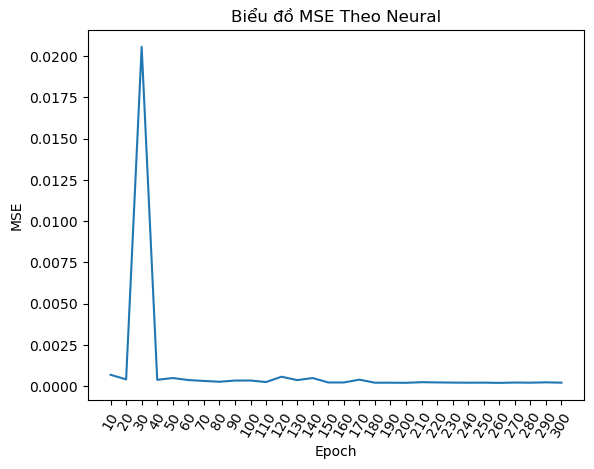

In [25]:
# Vẽ biểu đồ
plt.plot(epochArr, df_MseWith_Neural[['MSE']])
plt.title("Biểu đồ MSE Theo Neural")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.xticks(epochArr, rotation=60)
plt.show()